## Goal
To build a machine learning model that can predict salary based on a person’s characteristics.

## Importing Libraries

In [1]:
import pandas as pd ## to import the dataset and analyze it
import matplotlib.pyplot as plt ## for statistical graphs
import seaborn as sns ## for statistical graphs
import numpy as np ## for work with matrices
from sklearn.model_selection import train_test_split ## for split the dataset

## Reading the dataset

In [5]:
url = "https://raw.githubusercontent.com/caro6852lq/MachineLearning_PredictSalary/main/Data/2025.2%20-%20Sysarmy%20-%20Encuesta%20de%20remuneraci%C3%B3n%20salarial%20Argentina%20-%20Sysarmy%20-%20sueldos%20-%202025.02CLEAN.csv"

In [9]:
df = pd.read_csv(url, skiprows=9) ## The file has header and rows that do not contain data

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [10]:
df.head(2) 

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre,...,salir_o_seguir_contestando_sobre_las_guardias1,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2511178.0,2085000.0,Cobro parte del salario en dólares,Dólar oficial al día de oago,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,43,Mujer Cis,No,True,Semi-Senior,2511178.0
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,2140000.0,2140000.0,Cobro todo el salario en dólares,1160,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,59,Mujer Cis,Sí,True,Senior,2140000.0


In [11]:
df.shape #check of quantity of columns and rows

(3748, 56)

In [13]:
df.info() # check de tipo de dato por columnas
## Ajustar la columna de precio, latitud y longitud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 56 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   donde_estas_trabajando                                                                         3748 non-null   object 
 1   dedicacion                                                                                     3748 non-null   object 
 2   tipo_de_contrato                                                                               3748 non-null   object 
 3   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos                                      3748 non-null   float64
 4   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos                                       3580 non-null   float64
 5   pagos_en_dolares    

In [14]:
df_0 = df

## Limpieza de Datos

In [15]:
## Ajusto la columna de precio
df["price_usd"] = (
    df["price_usd"]
      .str.replace("k", "", regex=True)   # quita k/K finales
      )
df["price_usd"] = df["price_usd"].astype("float64")
df["price_usd"] = df["price_usd"]*100

In [16]:
#Transformar Latitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lat'] = df['lat'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lat'] = df['lat'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lat'] = df['lat'].astype('float64') # paso a float

In [17]:
#Transformar lonitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lon'] = df['lon'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lon'] = df['lon'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lon'] = df['lon'].astype('float64') # paso a float

In [18]:
# Saber si hay nulos
df.isnull().sum()

ID                    0
property_type       488
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

In [19]:
#Reemplazo los nulos por "sin dato"
df.fillna({'property_type': 'Sin Dato'}, inplace=True)

In [20]:
#Completar nulos
df = df.fillna(0)

## Analisis Exploratorio (previo modelo)

### Limpieza de Outliers Target

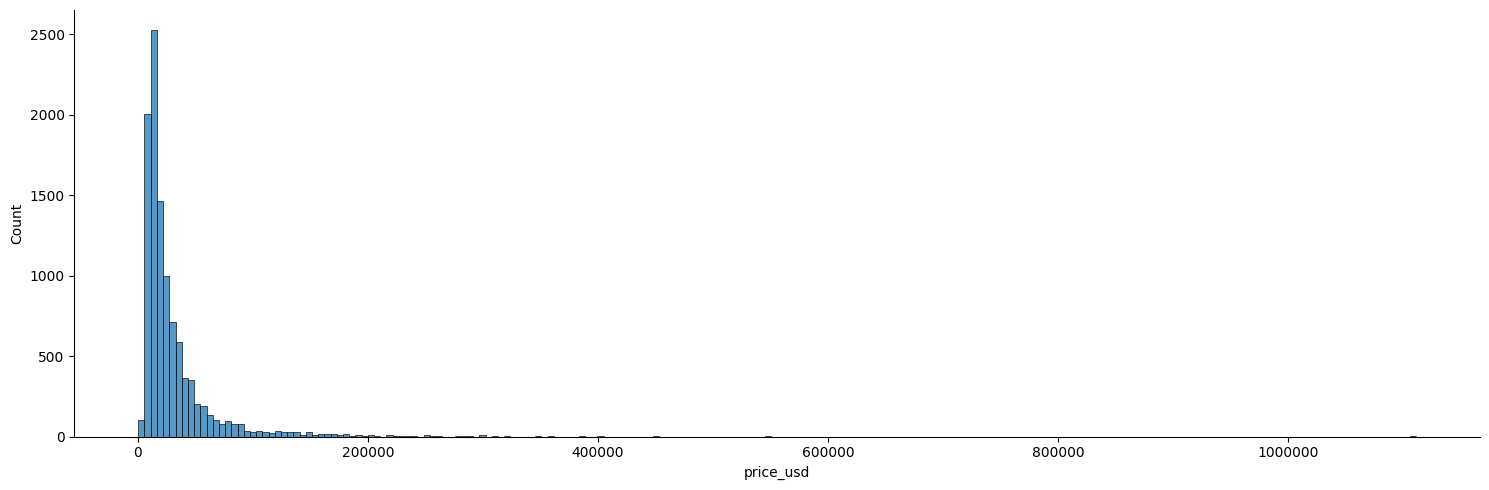

In [21]:
## Reviso la distribución de la variable a predecir
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [22]:
pd.set_option('display.float_format', '{:,.2f}'.format)

df.price_usd.describe()

count      10,567.00
mean       30,432.62
std        37,126.58
min           504.30
25%        12,400.00
50%        18,900.00
75%        34,000.00
max     1,111,111.10
Name: price_usd, dtype: float64

##### Método DS

In [23]:
media = df["price_usd"].mean()
desv_std = df["price_usd"].std()
print(media, desv_std)

30432.62409387716 37126.580671302414


In [24]:
LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std
print(LI_DS, LS_DS)

-80947.11792003008 141812.3661077844


In [25]:
# Filtramos los valores dentro del rango
df = df[(df["price_usd"] >= LI_DS) & (df["price_usd"] <= LS_DS)]
df.shape


(10343, 14)

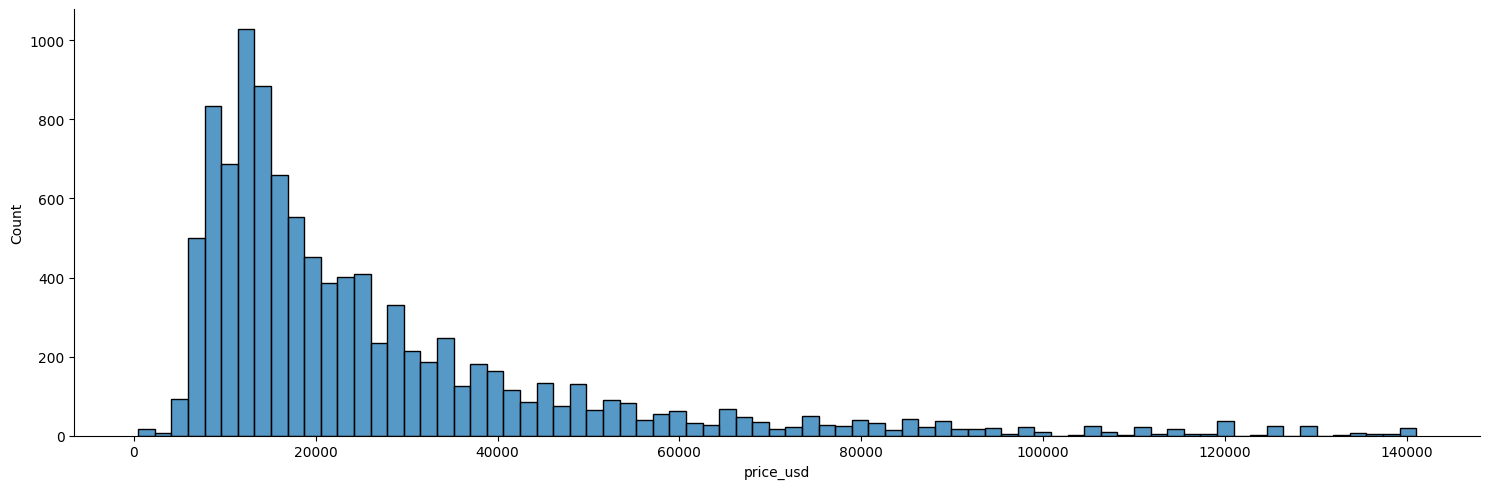

In [26]:
## Reviso el df_limpio
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

### Limpieza de Outliers Variables

#### Variables Numéricas

##### Sup Total

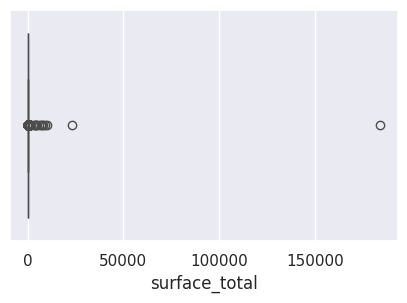

In [27]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_total"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [28]:
df = df[df['surface_total'] < 184000]

In [29]:
## Superficie Total por DS

media = df["surface_total"].mean()
desv_std = df["surface_total"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['surface_total']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


-847.1418173918726 1065.9385685038433 (13, 14)


In [30]:
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["surface_total"] >= LI_DS) & (df["surface_total"] <= LS_DS)]
df.shape


(10329, 14)

In [31]:
# Agrego un filtro arbitrario para valores bajos ya que no surgió por los métodos tradicionales
df = df[(df["surface_total"] >= 10)]
df.shape


(10321, 14)

##### Sup Cubierta

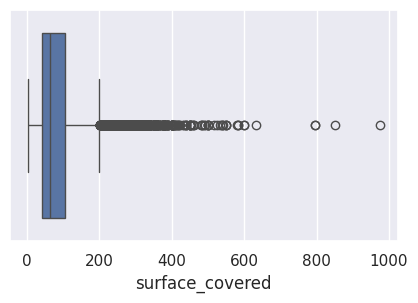

In [32]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_covered"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Lat y Lon

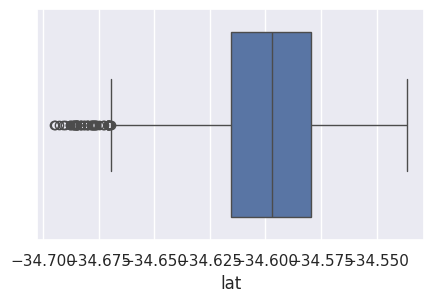

In [33]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lat"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

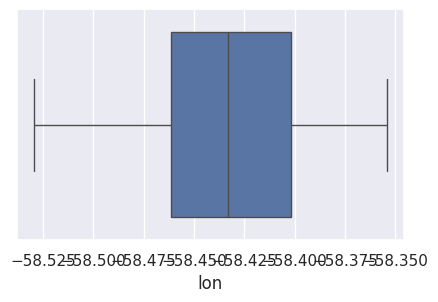

In [34]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lon"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Rooms

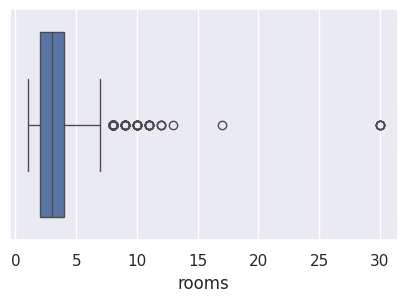

In [35]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["rooms"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

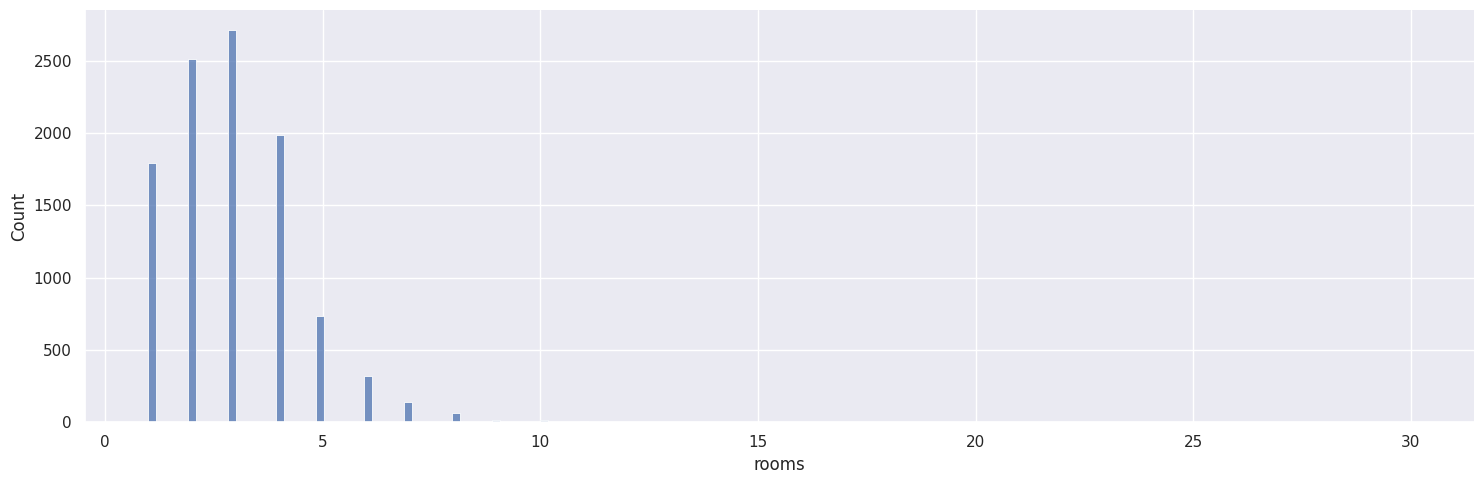

In [36]:
## Reviso el df_limpio
sns.displot(df["rooms"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [37]:
## En este caso tomo un modo arbitrario
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["rooms"] < 17) ]

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

Registros en df limpio: 10315
Registros en df original: 10567
% Registros conservados; 1.0


#### Variables Categóricas

In [38]:
##Para ver los valores que asume una dimensión
df["property_type"].unique()

array(['apartment', 'house', 'Sin Dato'], dtype=object)

In [39]:
## Borro los registros "Sin Dato" para tipo de propiedad
df = df[df["property_type"] !='Sin Dato']

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

Registros en df limpio: 9841
Registros en df original: 10567
% Registros conservados; 1.0


In [40]:
##Para ver los valores que asume una dimensión
df["rooms"].unique()

array([ 2,  4,  3,  1,  5,  9,  6,  7,  8, 10, 12, 11, 13])

In [41]:
##Para ver los valores que asume una dimensión
df["barrio"].unique()

array(['BALVANERA', 'PALERMO', 'ALMAGRO', 'BELGRANO', 'MONSERRAT',
       'PUERTO MADERO', 'CABALLITO', 'RECOLETA', 'SAN NICOLAS',
       'MATADEROS', 'FLORES', 'VILLA URQUIZA', 'PARQUE AVELLANEDA',
       'VERSALLES', 'NUÑEZ', 'VILLA SANTA RITA', 'MONTE CASTRO',
       'VILLA CRESPO', 'RETIRO', 'VILLA LURO', 'COLEGIALES', 'CHACARITA',
       'LINIERS', 'VILLA DEVOTO', 'FLORESTA', 'COGHLAN', 'AGRONOMIA',
       'NUEVA POMPEYA', 'PARQUE CHAS', 'CONSTITUCION', 'SAN CRISTOBAL',
       'BOCA', 'PARQUE PATRICIOS', 'VILLA PUEYRREDON', 'BOEDO',
       'VILLA GRAL. MITRE', 'PATERNAL', 'VILLA SOLDATI', 'BARRACAS',
       'SAN TELMO', 'VILLA DEL PARQUE', 'VILLA REAL', 'SAAVEDRA',
       'VELEZ SARSFIELD', 'VILLA ORTUZAR', 'PARQUE CHACABUCO',
       'VILLA LUGANO', 'VILLA RIACHUELO'], dtype=object)

In [42]:
##Para ver los valores que asume una dimensión
df["comuna"].unique()

array([ 3, 14,  5, 13,  1,  6,  2,  9,  7, 12, 10, 11, 15,  4,  8])

In [43]:
#Entender que tienen de diferente barrio y columna
df.groupby(['barrio', 'comuna']).size().sort_index(level=['comuna', 'barrio'])


barrio             comuna
CONSTITUCION       1          124
MONSERRAT          1          190
PUERTO MADERO      1          145
RETIRO             1          366
SAN NICOLAS        1          266
SAN TELMO          1           88
RECOLETA           2         1077
BALVANERA          3          539
SAN CRISTOBAL      3           96
BARRACAS           4          124
BOCA               4           70
NUEVA POMPEYA      4           35
PARQUE PATRICIOS   4           63
ALMAGRO            5          421
BOEDO              5           63
CABALLITO          6          518
FLORES             7          417
PARQUE CHACABUCO   7           77
VILLA LUGANO       8           56
VILLA RIACHUELO    8            3
VILLA SOLDATI      8            8
LINIERS            9          112
MATADEROS          9           69
PARQUE AVELLANEDA  9           33
FLORESTA           10          92
MONTE CASTRO       10          92
VELEZ SARSFIELD    10          68
VERSALLES          10          46
VILLA LURO         10 

### Variables a considerar

In [44]:
## Saco: description, title, floor (x cantidad de nulos), columnas calculadas, expensas porque la mayoría tiene valor $0
df=df[["ID", "property_type",'lat', 'lon','price_usd', 'surface_total', 'surface_covered','rooms',
       'barrio', 'comuna']]

In [45]:
# Defino las variables numéricas
numerical = ['lat', 'lon', 'surface_total','surface_covered', 'rooms']

In [46]:
# Defino las variables categóricas
categorical = ['property_type','barrio', 'comuna']

#### Correlación

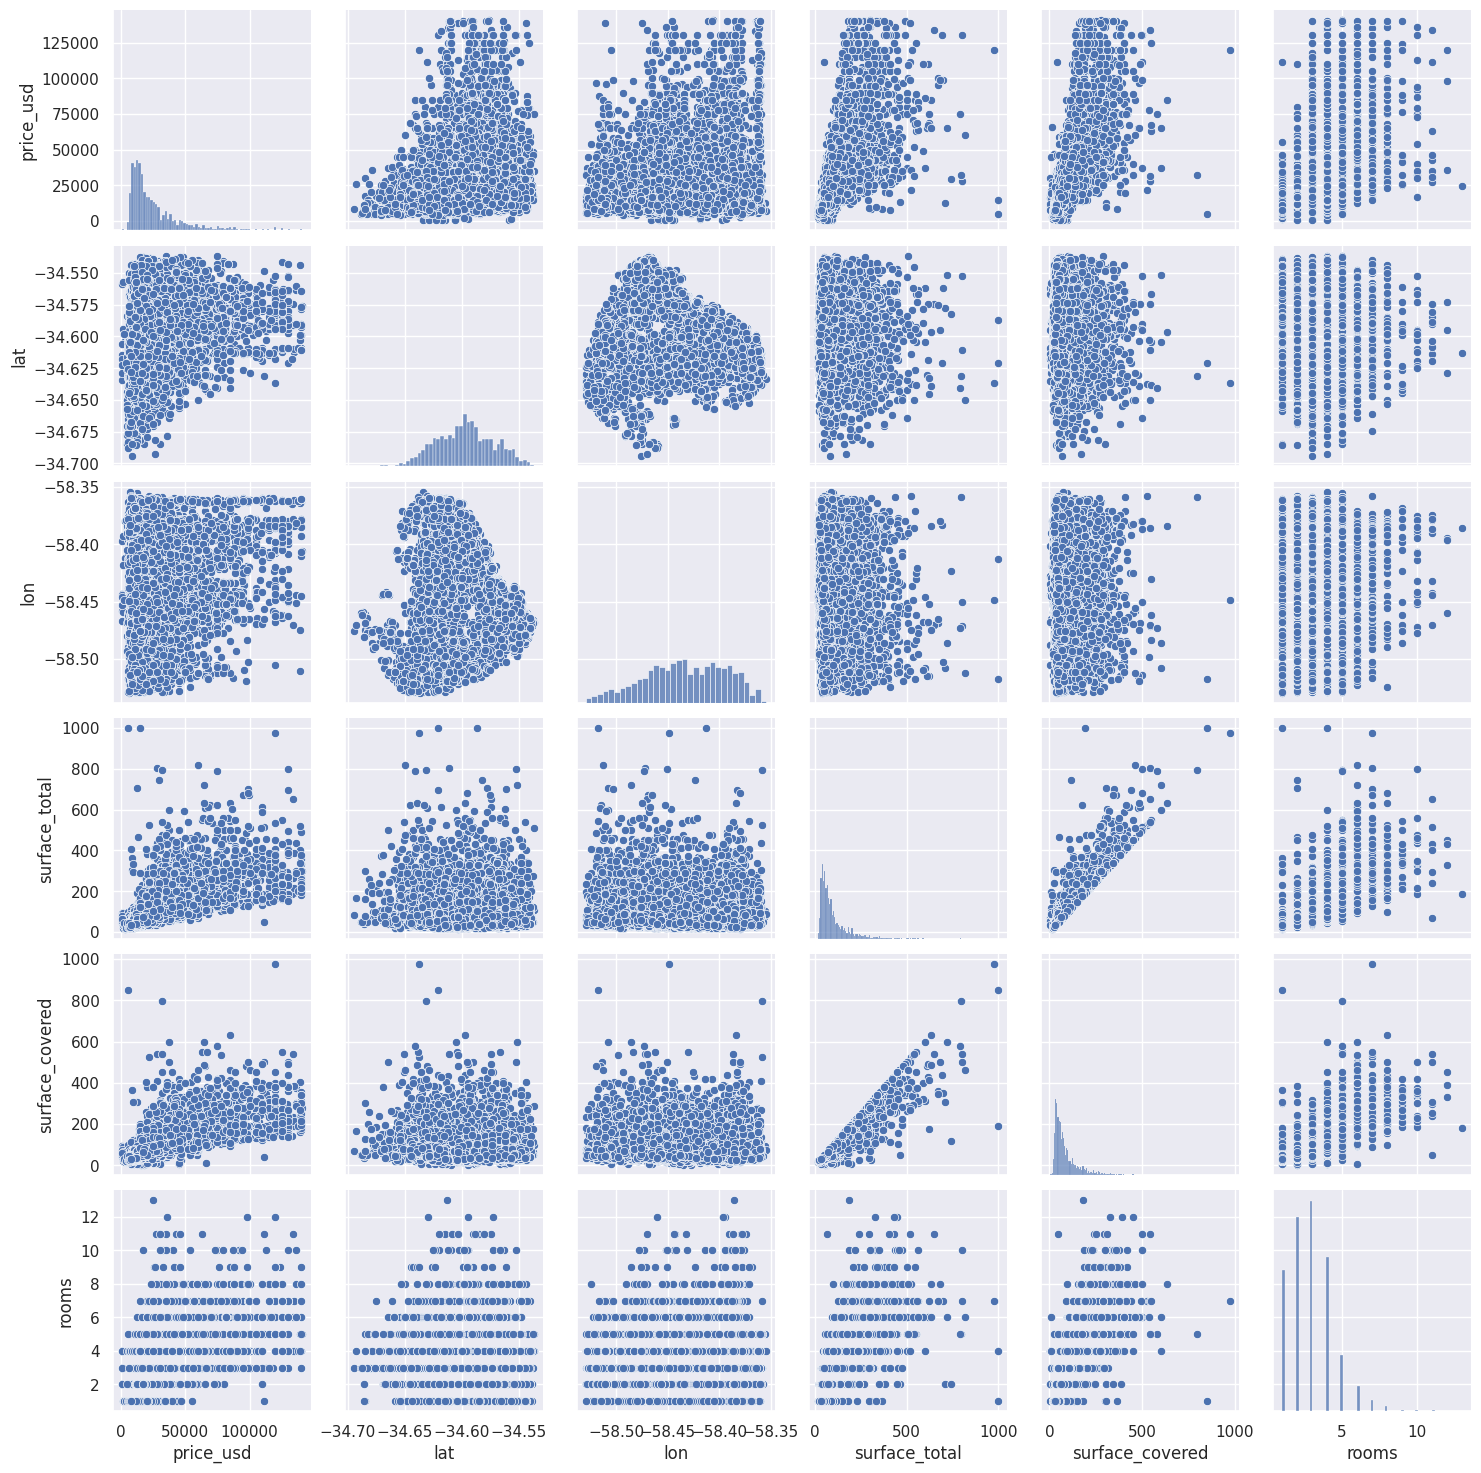

In [47]:
## Analizo la correlación para variables numéricas

sns.pairplot(df[['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']])

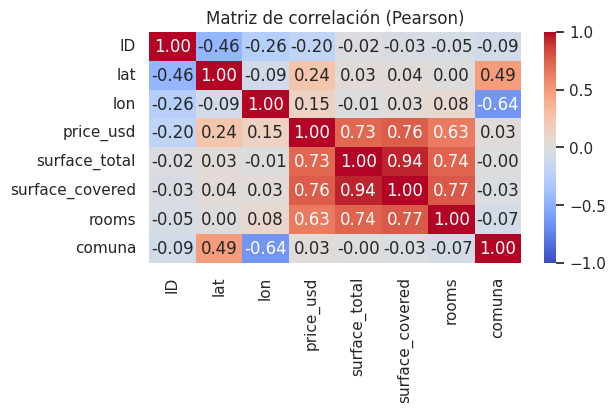

In [48]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

### Divido el Dataset

In [49]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price_usd.values
y_val = df_val.price_usd.values
y_test = df_test.price_usd.values

del df_train['price_usd']
del df_val['price_usd']
del df_test['price_usd']

In [50]:
len(df_train), len(df_test), len(df_val)

(5904, 1969, 1968)

## Modelo Regresión Lineal

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
from sklearn.feature_extraction import DictVectorizer

In [53]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#Hago la predicción
y_pred = model.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

## RL r2_score --  0.7557617985788082

0.7557617985788082

## Modelo Decision Tree

In [55]:
#Importo la función que necesito
from sklearn.tree import DecisionTreeRegressor

In [56]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [57]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [58]:
#from sklearn.tree import export_text
#print(export_text(dtr, feature_names=dv.get_feature_names_out()))

In [59]:
#Hago la predicción con TEST
y_pred = dtr.predict(X_train)

#Mido el modelo
r2_score(y_train, y_pred)

1.0

In [60]:
#Hago la predicción con VAL
y_pred = dtr.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441

0.7517045634704966

#### Decision trees parameter tuning

In [61]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
     
    #Hago la predicción
    y_pred = dtr.predict(X_val)
    
    #Mido el modelo
    r2 = r2_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, r2))



   1 -> 0.510
   2 -> 0.630
   3 -> 0.728
   4 -> 0.774
   5 -> 0.791
   6 -> 0.814
  10 -> 0.795
  15 -> 0.746
  20 -> 0.767
None -> 0.755


In [62]:
scores = []
 
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dtr = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dtr.fit(X_train, y_train)
 
        #Hago la predicción y mido el modelo
        y_pred = dtr.predict(X_val)
        r2 = r2_score(y_val, y_pred)
             
        scores.append((d, s, r2))
 
columns = ['max_depth', 'min_samples_leaf', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)

In [63]:
df_scores.sort_values(by='r2', ascending=False).head()

,max_depth,min_samples_leaf,r2
12,2.00,10,0.82
75,20.00,10,0.82
84,NaN,10,0.82
66,15.00,10,0.82
30,4.00,10,0.82


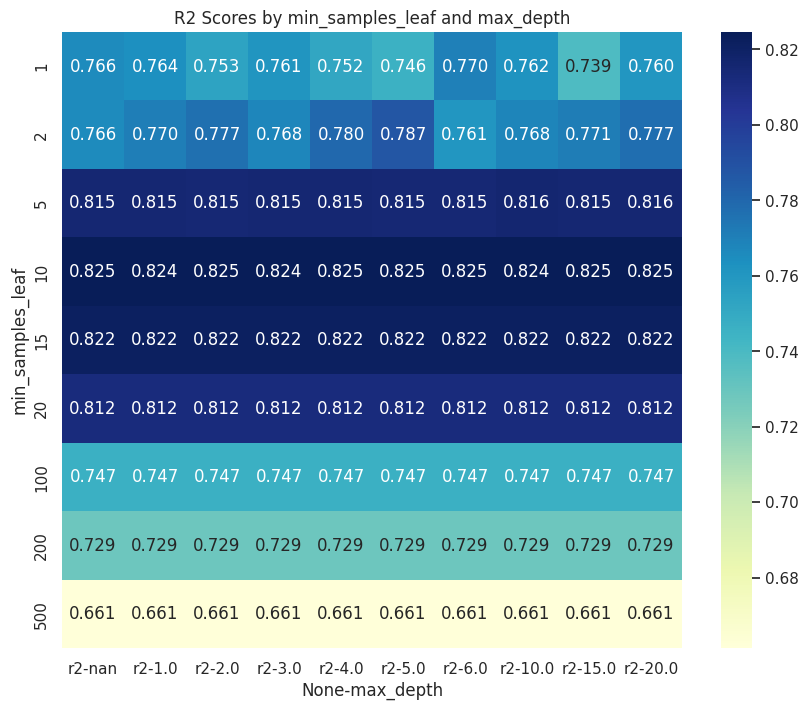

In [64]:
plt.figure(figsize=(10, 8))  # ancho x alto, podés ajustar los valores
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", cmap="YlGnBu")

plt.title("R2 Scores by min_samples_leaf and max_depth")
plt.show()

In [65]:
## Modelo con parámetros ajustados
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [66]:
# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825

## Modelo Random-forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor(n_estimators=10, 
                            random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
y_pred = rf.predict(X_val)

In [70]:
#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492

0.8497901763819492

In [71]:
scores = []
 
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred)
 
        scores.append((d, n, r2))
 
columns = ['max_depth', 'n_estimators', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,r2
0,10,10,0.85
1,10,20,0.86
2,10,30,0.86
3,10,40,0.86
4,10,50,0.86


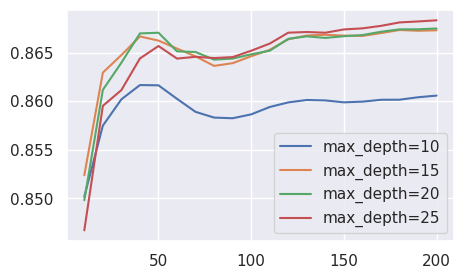

In [72]:
# Let's plot it
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.r2,
             label='max_depth=%d' % d)
 
plt.legend()

In [73]:
rf = RandomForestRegressor(n_estimators=25,
                           max_depth = 200,
                           random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

,n_estimators,25
,criterion,'squared_error'
,max_depth,200
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
y_pred = rf.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553

0.8627054610020553

In [75]:
!pip install xgboost
 
import xgboost as xgb

In [76]:
features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [77]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [78]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839

0.8505679046774839

In [79]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [80]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [81]:
scores = {}

In [82]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [83]:
'eta=%s' % (xgb_params['eta'])
# Output: 'eta=0.3'

'eta=0.3'

In [84]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
 
# Output: 'eta=0.3'

'eta=0.3'

In [85]:
scores

{'eta=0.3':      num_iter  train_rmse  val_rmse
 0           0   17,286.61 17,865.38
 1           1   13,797.03 14,571.98
 2           2   11,442.66 12,301.53
 3           3   10,015.49 10,918.91
 4           4    9,107.89 10,174.29
 ..        ...         ...       ...
 195       195    1,948.54  8,358.97
 196       196    1,940.48  8,357.21
 197       197    1,935.01  8,356.78
 198       198    1,919.69  8,353.91
 199       199    1,915.09  8,352.68
 
 [200 rows x 3 columns]}

In [86]:
scores['eta=0.3']

,num_iter,train_rmse,val_rmse
0,0,"17,286.61","17,865.38"
1,1,"13,797.03","14,571.98"
2,2,"11,442.66","12,301.53"
3,3,"10,015.49","10,918.91"
4,4,"9,107.89","10,174.29"
...,...,...,...
195,195,"1,948.54","8,358.97"
196,196,"1,940.48","8,357.21"
197,197,"1,935.01","8,356.78"
198,198,"1,919.69","8,353.91"


In [100]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [101]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
# Output: 'eta=1.0'

'eta=0.05'

In [102]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.5', 'eta=0.05'])

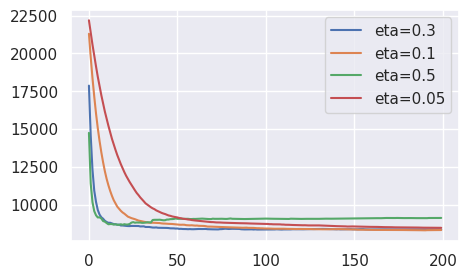

In [103]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.legend()

Me quedo con eta de 0.3

In [104]:
scores = {}

In [109]:
%%capture output

xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 15,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [110]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=15'

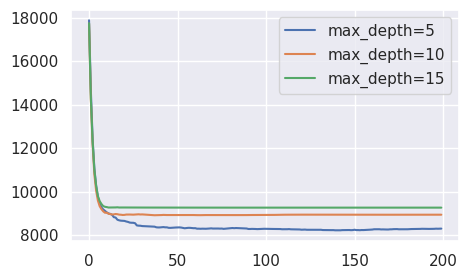

In [112]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()

In [113]:
scores = {}

In [120]:
%%capture output

xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 30,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [121]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

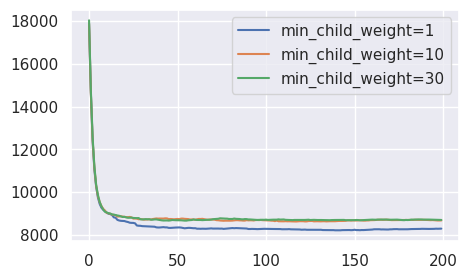

In [122]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)
 
plt.legend()

In [123]:
xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 1, ## Mejor opción
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [124]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839
# XGB Ajustado r2_score --- 0.8711028223293713

0.8711028223293713

## Selección de Modelo Final

En este análisis se probaron diferentes modelos: de regresión lineal, árbol de decisión, random forest y xgboost.

La métrica utilizada para evaluar el desempeño de los modelos fue el coeficiente de determinación R², que mide qué tan bien las variables explican la variabilidad del precio.

Se selecciona el modelo xgboost

#### Entreno el modelo final

In [125]:
df_full_train.head()

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,rooms,barrio,comuna
8890,9861,apartment,-34.62,-58.40,"13,200.00",71,68,3,SAN CRISTOBAL,3
1096,1714,apartment,-34.59,-58.43,"14,990.00",45,40,1,PALERMO,14
9346,7913,apartment,-34.61,-58.45,"15,000.00",50,50,2,CABALLITO,6
6508,253,apartment,-34.55,-58.47,"10,800.00",45,39,1,SAAVEDRA,12
2290,376,apartment,-34.55,-58.45,"16,900.00",68,42,2,BELGRANO,13


In [126]:
df_full_train = df_full_train.reset_index(drop=True)

In [127]:
y_full_train = df_full_train.price_usd.values

array([13200., 14990., 15000., ..., 22000., 15700., 18500.], shape=(7872,))

In [128]:
del df_full_train['price_usd']

In [129]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [131]:
feature_names = list(dv.get_feature_names_out())

In [132]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [133]:
xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 1, ## Mejor opción
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params,dfulltrain, num_boost_round=100)

In [138]:
y_pred = model_xgb.predict(dtest)

#Mido el modelo
r2_score(y_test, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839
# XGB Ajustado r2_score --- 0.8711028223293713

0.8672161385920899

In [140]:
print('Real      : ', y_test[:5])
print('Prediccion: ', y_pred[:5])

Real      :  [39900. 40000. 29800. 27000. 51900.]
Prediccion:  [56723.582 40678.14  29661.61  28363.676 56254.535]


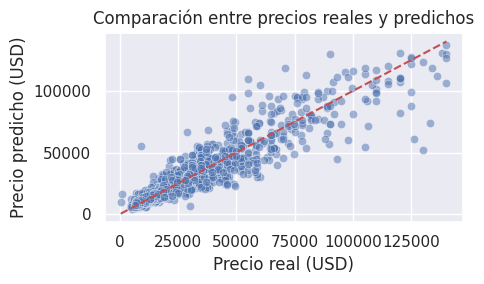

In [144]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Línea ideal: donde y = x (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("Comparación entre precios reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

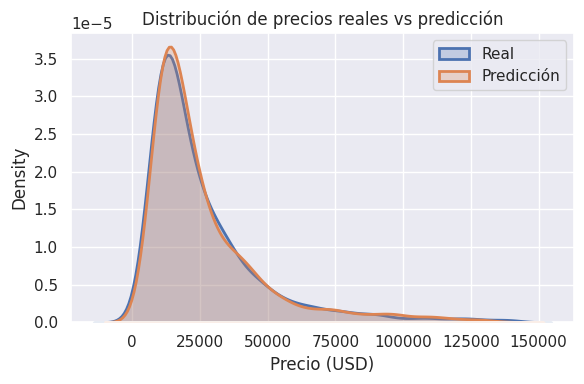

In [146]:
plt.figure(figsize=(6,4))

sns.kdeplot(y_test, label='Real', fill=True, linewidth=2)
sns.kdeplot(y_pred, label='Predicción', fill=True, linewidth=2)

plt.title('Distribución de precios reales vs predicción')
plt.xlabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()